In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path, dirs, files = next(os.walk('/content/drive/MyDrive/disc/sentiment/my_dataset/all'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  2010


In [ ]:
file_names = os.listdir('/content/drive/MyDrive/disc/sentiment/my_dataset/all')
print(file_names)

['negative.784.jpg', 'positive.742.jpg', 'positive.2069.jpg', 'positive.1087.jpg', 'positive.1157.jpg', 'positive.707.jpg', 'negative.1940.jpg', 'positive.1183.jpg', 'negative.1739.jpg', 'positive.1545.jpg', 'positive.1195.jpg', 'positive.2379.jpg', 'positive.2052.jpg', 'negative.937.jpg', 'positive.1784.jpg', 'negative.2349.jpg', 'positive.1213.jpg', 'positive.670.jpg', 'positive.1440.jpg', 'positive.1733.jpg', 'positive.1139.jpg', 'positive.1178.jpg', 'negative.782.jpg', 'positive.2055.jpg', 'positive.1037.jpg', 'positive.912.jpg', 'positive.2424.jpg', 'positive.2074.jpg', 'positive.1633.jpg', 'negative.764.jpg', 'positive.847.jpg', 'positive.790.jpg', 'positive.1280.jpg', 'positive.1033.jpg', 'negative.1237.jpg', 'negative.152.jpg', 'positive.242.jpg', 'positive.1715.jpg', 'positive.2312.jpg', 'negative.1906.jpg', 'positive.1734.jpg', 'positive.2454.jpg', 'positive.1999.jpg', 'negative.917.jpg', 'negative.1577.jpg', 'positive.676.jpg', 'negative.1380.jpg', 'positive.1091.jpg', 'nega

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

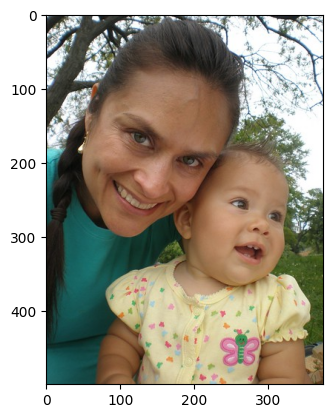

In [ ]:
# display dog image
img = mpimg.imread('/content/drive/MyDrive/disc/sentiment/my_dataset/all/positive.546.jpg')
imgplt = plt.imshow(img)
plt.show()

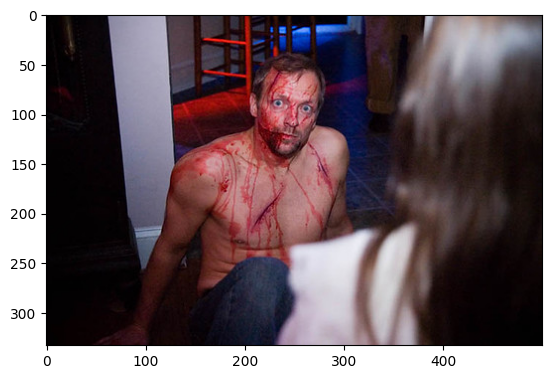

In [ ]:
# display cat image
img = mpimg.imread('/content/drive/MyDrive/disc/sentiment/my_dataset/all/negative.485.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/drive/MyDrive/disc/sentiment/my_dataset/all')

pos_count = 0
neg_count = 0

for img_file in file_names:

  name = img_file[0:8]

  if name == 'positive':
    pos_count += 1

  else:
    neg_count += 1

print('Number of positive images =', pos_count)
print('Number of negative images =', neg_count)

Number of positive images = 1528
Number of negative images = 482


In [ ]:
original_folder = '/content/drive/MyDrive/disc/sentiment/my_dataset/all/'
resized_folder  = '/content/drive/MyDrive/disc/sentiment/my_dataset/resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

KeyboardInterrupt: 

In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/drive/MyDrive/disc/sentiment/my_dataset/resized'))
print(len(files))

2000


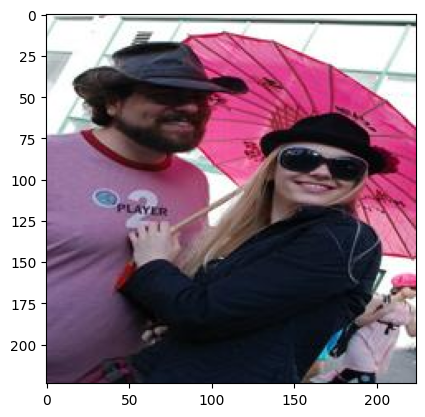

In [ ]:
# display resized dog image
img = mpimg.imread('/content/drive/MyDrive/disc/sentiment/my_dataset/resized/positive.138.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/drive/MyDrive/disc/sentiment/my_dataset/resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:8]

  if label == 'positive':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['positive.1249.jpg', 'positive.2342.jpg', 'positive.1668.jpg', 'positive.1618.jpg', 'positive.656.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 1, 1, 1, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 482 1518]


In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/drive/MyDrive/disc/sentiment/my_dataset/resized/'
image_extension = ['jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

pos_neg_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(pos_neg_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = pos_neg_images
Y = np.asarray(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

train_ds = preprocess_input(X_train)
test_ds = preprocess_input(X_test)

base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)
base_model.trainable = False


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras import layers, models


flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')



model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 50)                1254450   
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 2)                 42        
                                                                 
Total params: 15970200 (60.92 MB)
Trainable params: 1255512 (4.79 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
size = (150, 150)

train_ds = tf.image.resize(X_train, (224, 224))
test_ds = tf.image.resize(X_test, (224, 224))

#train_labels = to_categorical(Y_train, num_classes=2)
#test_labels = to_categorical(Y_test, num_classes=2)

Epoch 1/10
40/40 [==============================] - 861s 22s/step - loss: 2.0291 - accuracy: 0.7078 - val_loss: 1.0199 - val_accuracy: 0.7688
Epoch 2/10
40/40 [==============================] - 896s 23s/step - loss: 0.4082 - accuracy: 0.9180 - val_loss: 1.0125 - val_accuracy: 0.7625
Epoch 3/10
13/13 [==============================] - 213s 16s/step - loss: 1.1230 - accuracy: 0.7575


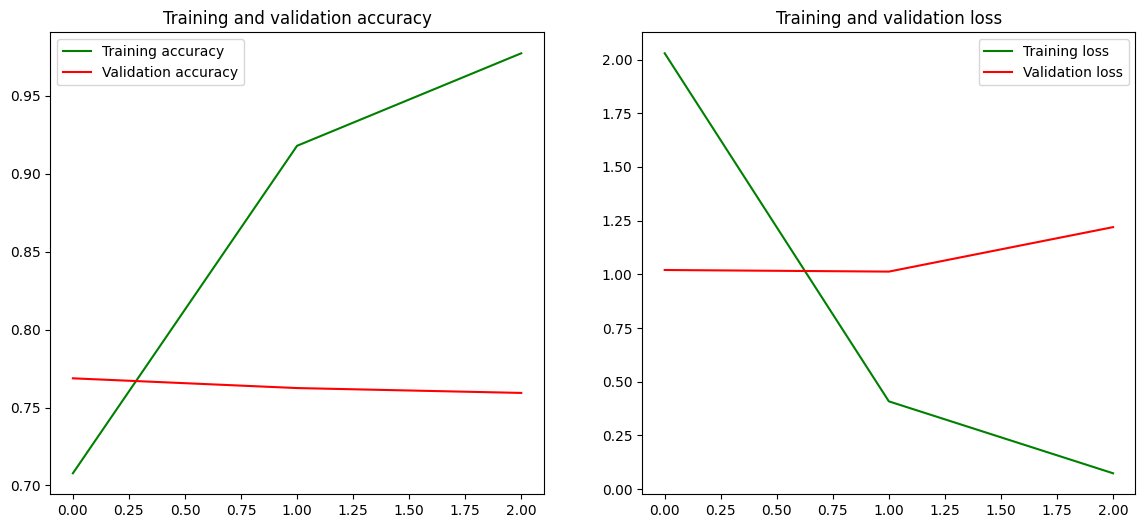

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=2,  restore_best_weights=True)

history2 = model.fit(train_ds, Y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

model.evaluate(test_ds, Y_test)

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(history2)

In [ ]:
model.evaluate(test_ds, Y_test)

13/13 [==============================] - 260s 20s/step - loss: 0.5304 - accuracy: 0.7900


[0.5304069519042969, 0.7900000214576721]

In [ ]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()
plot_accuracy_and_loss(model)

KeyError: 'accuracy'

In [ ]:
print(model.history.history.keys())

dict_keys([])


**Mobile NetV2**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model2 = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model2.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
X_train_scaled = X_train/255


NameError: name 'X_train' is not defined

In [ ]:
history2 = model.fit(X_train_scaled, Y_train, epochs=5)

In [ ]:
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=2,  restore_best_weights=True)

history2 = model.fit(train_ds, Y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/10
 2/40 [>.............................] - ETA: 11:47 - loss: 0.5012 - accuracy: 0.8125

KeyboardInterrupt: 